In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
salary_train = pd.read_csv('SalaryData_Train(1).csv')
salary_test = pd.read_csv('SalaryData_Test(1).csv')

In [3]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
salary_train.dropna()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
salary_test.dropna()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Outlier Detection and Cleaning

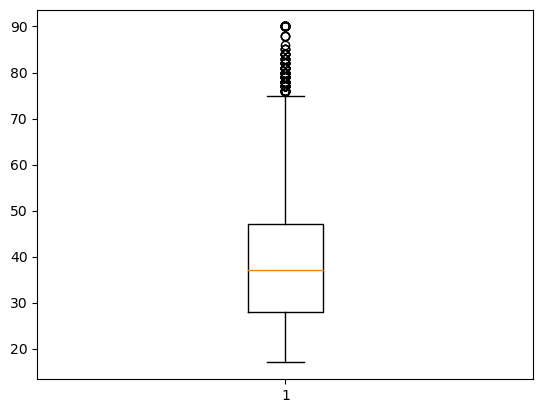

In [9]:
data_box=salary_train.dropna()
data_box1=data_box.age
plt.boxplot(data_box1)
plt.show()

In [10]:
salary_train.age.describe()

count    30161.000000
mean        38.438115
std         13.134830
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

# Data Visualization for Train Data

In [11]:
salary_train["workclass"].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

<AxesSubplot:>

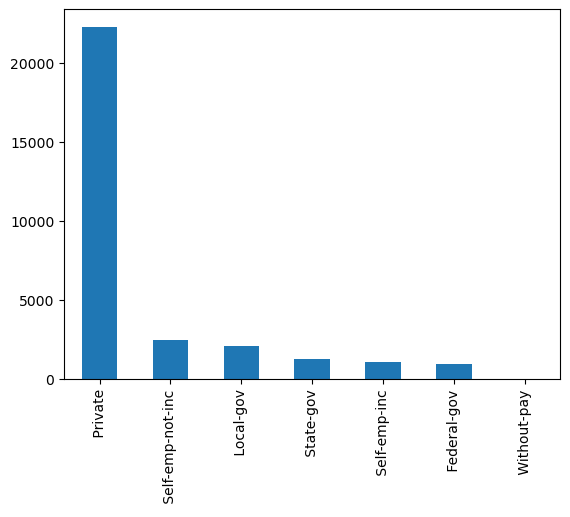

In [12]:
val_counts=salary_train["workclass"].value_counts()
val_counts.plot.bar()

In [13]:
salary_train["education"].value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

<AxesSubplot:>

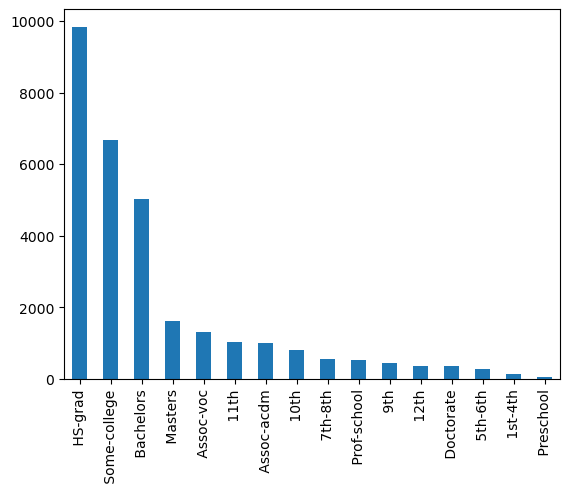

In [14]:
val_counts=salary_train["education"].value_counts()
val_counts.plot.bar()

In [15]:
salary_train["maritalstatus"].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

<AxesSubplot:>

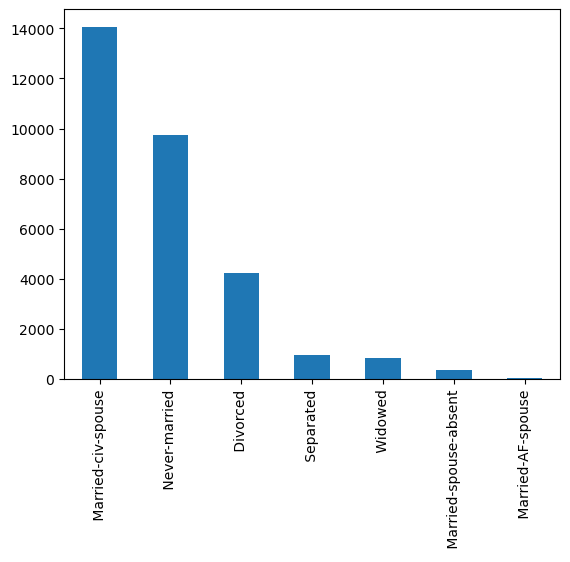

In [16]:
val_counts=salary_train["maritalstatus"].value_counts()
val_counts.plot.bar()

In [17]:
salary_train["occupation"].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

<AxesSubplot:>

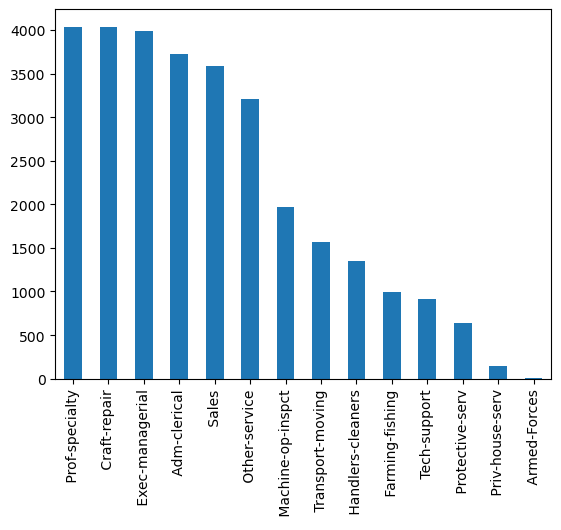

In [18]:
val_counts=salary_train["occupation"].value_counts()
val_counts.plot.bar()

In [19]:
salary_train["relationship"].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

<AxesSubplot:>

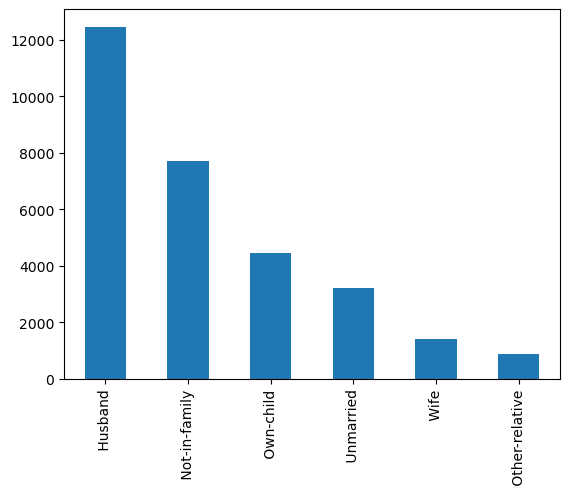

In [20]:
val_counts=salary_train["relationship"].value_counts()
val_counts.plot.bar()

In [21]:
salary_train["race"].value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

<AxesSubplot:>

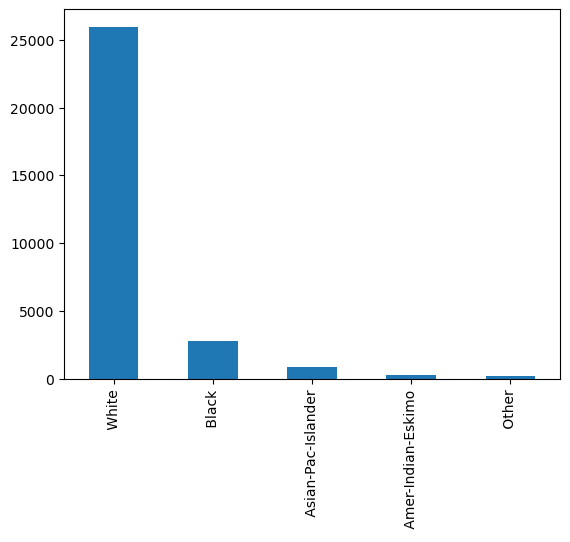

In [22]:
val_counts=salary_train["race"].value_counts()
val_counts.plot.bar()

In [23]:
salary_train["native"].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

<AxesSubplot:>

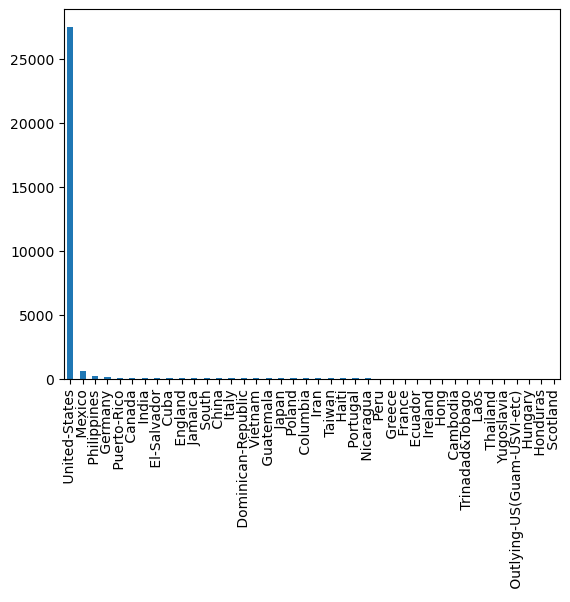

In [24]:
val_counts=salary_train["native"].value_counts()
val_counts.plot.bar()

In [25]:
salary_train["Salary"].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

<AxesSubplot:>

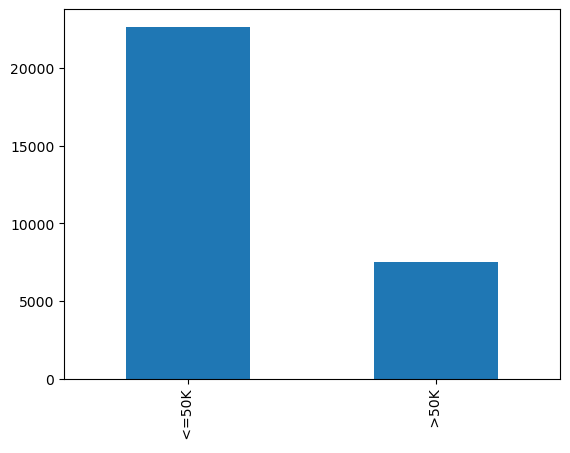

In [26]:
val_counts=salary_train["Salary"].value_counts()
val_counts.plot.bar()

# Data Visualization for Test Data

In [27]:
salary_test["workclass"].value_counts()

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

<AxesSubplot:>

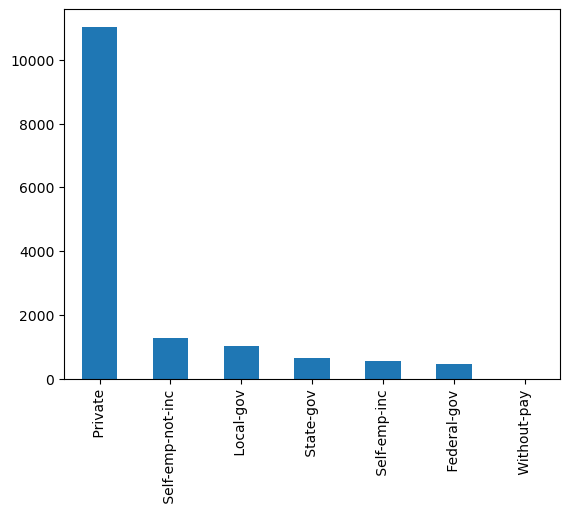

In [28]:
val_counts=salary_test["workclass"].value_counts()
val_counts.plot.bar()

In [29]:
salary_test["education"].value_counts()

 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64

<AxesSubplot:>

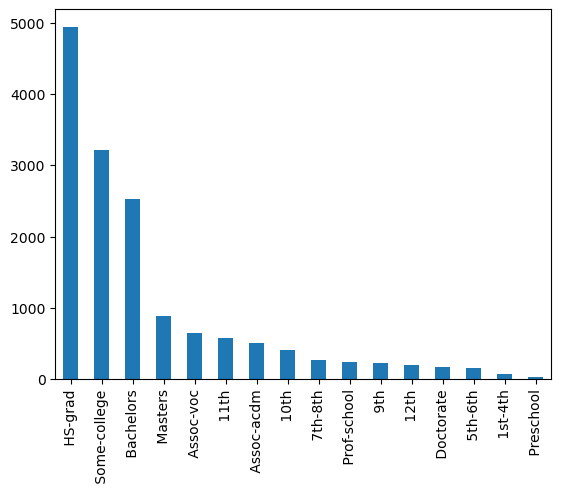

In [30]:
val_counts=salary_test["education"].value_counts()
val_counts.plot.bar()

In [31]:
salary_test["maritalstatus"].value_counts()

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

<AxesSubplot:>

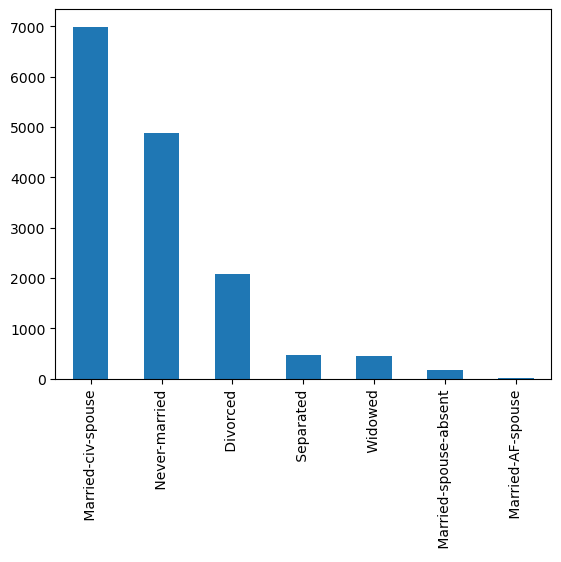

In [32]:
val_counts=salary_test["maritalstatus"].value_counts()
val_counts.plot.bar()

In [33]:
salary_test["occupation"].value_counts()

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

<AxesSubplot:>

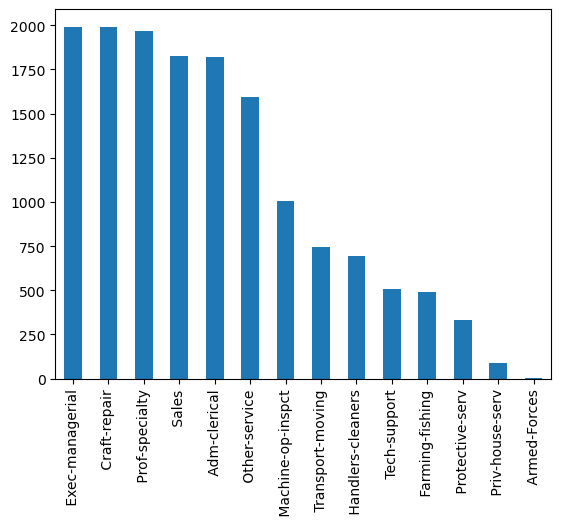

In [34]:
val_counts=salary_test["occupation"].value_counts()
val_counts.plot.bar()

In [35]:
salary_test["relationship"].value_counts()

 Husband           6203
 Not-in-family     3976
 Own-child         2160
 Unmarried         1576
 Wife               685
 Other-relative     460
Name: relationship, dtype: int64

<AxesSubplot:>

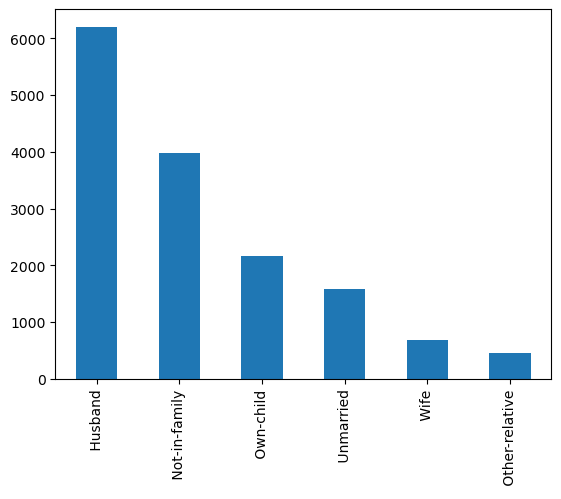

In [36]:
val_counts=salary_test["relationship"].value_counts()
val_counts.plot.bar()

In [37]:
salary_test["race"].value_counts()

 White                 12970
 Black                  1411
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: race, dtype: int64

<AxesSubplot:>

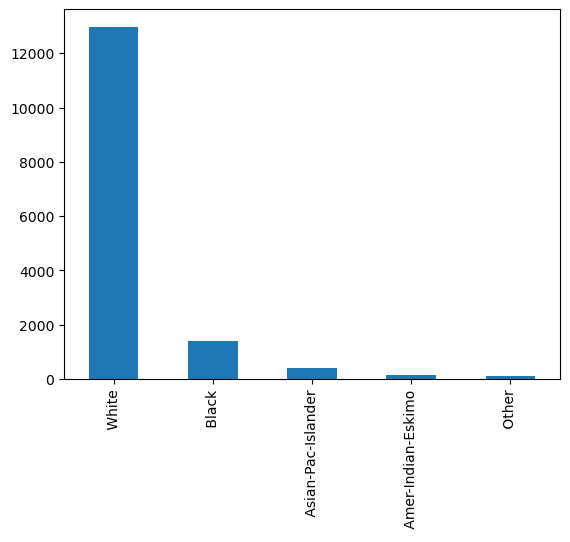

In [38]:
val_counts=salary_test["race"].value_counts()
val_counts.plot.bar()

In [39]:
salary_test["native"].value_counts()

 United-States                 13788
 Mexico                          293
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 South                            30
 Dominican-Republic               30
 Japan                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Guatemala                        23
 Jamaica                          23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

<AxesSubplot:>

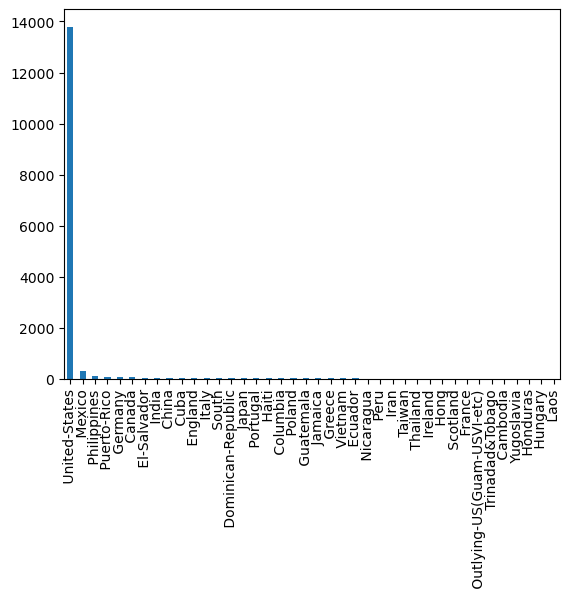

In [40]:
val_counts=salary_test["native"].value_counts()
val_counts.plot.bar()

In [41]:
salary_test["Salary"].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

<AxesSubplot:>

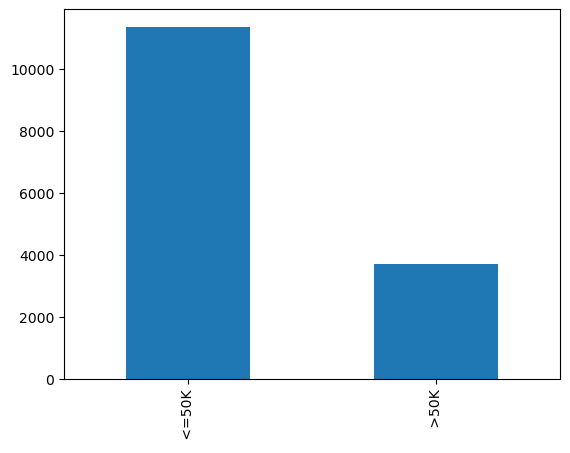

In [42]:
val_counts=salary_test["Salary"].value_counts()
val_counts.plot.bar()

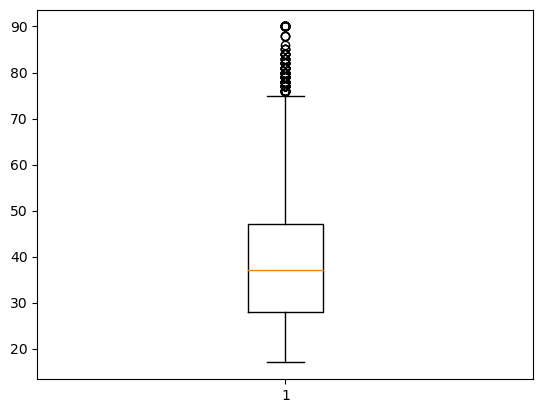

In [43]:
data_box=salary_train.dropna()
data_box1=data_box.age
plt.boxplot(data_box1)
plt.show()

# Data Type Conversion

In [44]:
categorical_features = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
encoder = LabelEncoder()
for feature in categorical_features:
    encoder.fit(list(salary_train[feature]) + list(salary_test[feature]))
    salary_train[feature] = encoder.transform(salary_train[feature])
    salary_test[feature] = encoder.transform(salary_test[feature])

In [45]:
X_train = salary_train.drop(['Salary'], axis=1)
y_train = salary_train['Salary']

In [46]:
X_test = salary_test.drop(['Salary'], axis=1)
y_test = salary_test['Salary']

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [48]:
X_test = scaler.transform(X_test)

In [49]:
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)

In [50]:
X_test = pca.transform(X_test)

In [51]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

In [52]:
svm_model = SVC()

In [53]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [54]:
accuracy = grid_search.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8452855245683931
